# 前缀python知识 

## zip方法
* 就是将多个可迭代对象,对应的元素打包成一个个元组。最终返回list(python2)或迭代器
(python3)
* 要求长度一致，如果不一致。以长度少的数组长度截取


In [5]:
a=[1,2,3]
b=[7,8,9]
c=[11,12,13,14]
abc=zip(a,b,c)
for o in abc:
    display(o)

(1, 7, 11)

(2, 8, 12)

(3, 9, 13)

## python魔法方法 object.__iter__(self)
* 简单来说就是当对对象进行遍历的时候会自动调用该方法
* 该方法返回一个可迭代对象


# 向量基本运算实现-覆写python魔法方法
* 复写魔改方法__add__、__sub__、__mul__使用此方法可以使用
* 复写迭代方法，返回传入数组
```python
  def __add__(self,other):
        return Vector([o1+o2 for o1,o2 in zip(self,other)])
    
  def __sub__(self,other):
        return Vector([o1-o2 for o1,o2 in zip(self,other)])
#   向量*k  
  def __mul__(self,k):
        # 错误，数组的乘法其实是扩容k倍
        # return Vector(self*k)
        return Vector([e * k for e in self])

  # 向量/k。正常触发不取整
  def __truediv__(self,k):
      return Vector([e / k for e in self])        

  def __iter__(self):
        return self._values.__iter__()

```

In [6]:
from LinearAlgebra.playLA.vector import Vector
a=Vector([1,2,3])
b=Vector([4,5,5])
display(a+b)
display(a-b)
display(a*2)
display(a/2)

Vector([5, 7, 8])

Vector([-3, -3, -2])

Vector([2, 4, 6])

Vector([0.5, 1.0, 1.5])

## 右魔法运算
* 我们执行如下操作
```python
# 此时2对应__mul__方法的self,a对应k
display(2*a)
```

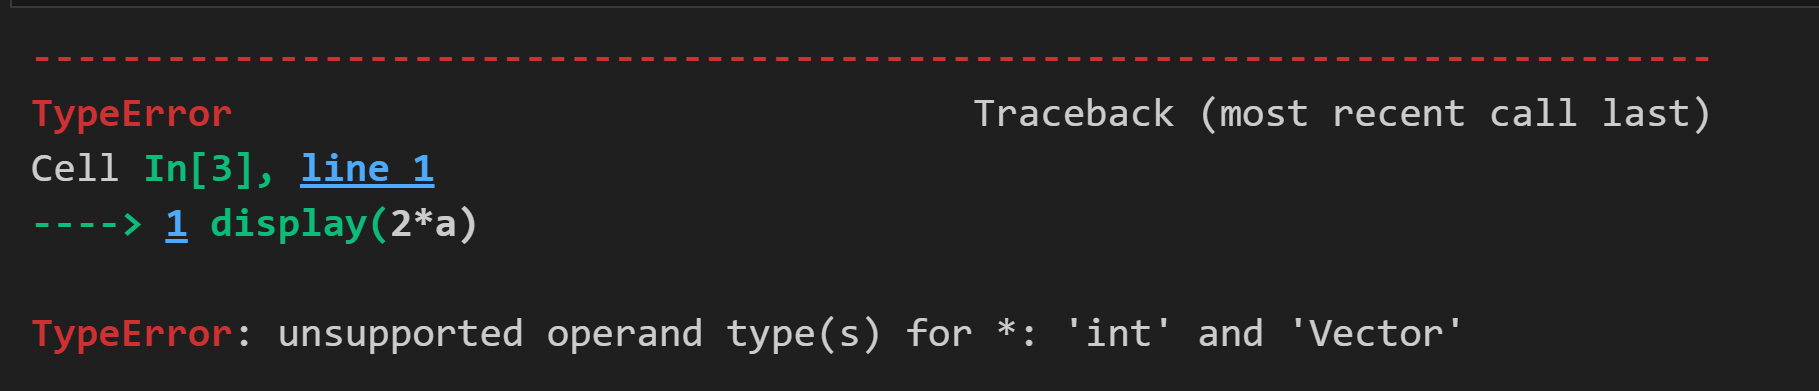

* 如果想支持以上操作，可以复用右魔法运算
```python
  def __rmul__(self,k):
        return Vector([e * k for e in self])
```


In [7]:
display(2*a)

Vector([2, 4, 6])

## 正负魔法运算

```python
    # 向量取正
    def __pos__(self):
        return Vector([1 * e for e in self])
    
    # 向量取负
    def __neg__(self):
        return Vector([-1 * e for e in self])
     
```

In [8]:
display(+a)
display(-a)

Vector([1, 2, 3])

Vector([-1, -2, -3])